In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_polytruth = pd.read_csv('poly_truth.tsv',sep='\t')
#df_quantboot = pd.read_csv('quant_bootstraps.tsv',sep='\t')
df_polytruth
#df_quantboot
print df_polytruth[df_polytruth['transcript_id']=='ENST00000349363']

        transcript_id  count
1839  ENST00000349363    210


In [ ]:
df_quantboot = pd.read_csv('quant_bootstraps.tsv',sep='\t')
#df_quantboot['ENST00000349363']

In [ ]:
import numpy as np



#df_quantboot['ENST00000382369']

df_polytruth['mean']=0
df_polytruth['std']=0


df_new = df_polytruth
#df_new['transcript_id']

#for i in df_new.columns:
#    print i
#mean = df_quantboot[row].mean()
    #print df_new[df_new['transcript_id']==i]
    #print mean
    #df_polytruth['std']= np.std(df_quantboot[i])
    
    
df_new['mean']=0
df_new['std']=0
df_new['deviation']=0
for index,row in df_new.iterrows():
    #print row
    try:
        mean = df_quantboot[row['transcript_id']].mean()
   
        df_new.loc[df_new.transcript_id==row['transcript_id'],'mean']=mean
    
        std= np.std(df_quantboot[row['transcript_id']])
        df_new.loc[df_new.transcript_id==row['transcript_id'],'std']=std
    #print df_new['std']
        row['std']=std
        row['mean'] = mean
        if row['std']!=0:
        #print abs(row['count']-row['mean'])/row['std']
            df_new.loc[df_new.transcript_id==row['transcript_id'],'deviation']= abs(row['count']-row['mean'])/row['std']
    except:
        pass
    
#df_new.apply(test, axis=1)
#df_new
#df_new.sort_values()
df_new=df_new.sort_values('deviation', ascending=False)

df_faulty = df_new[df_new['deviation']>2]
    
df_good = df_new[df_new['deviation']<=2]

df_new

In [ ]:
df_quantsf = pd.read_csv("quant.sf",sep='\t')
df_faulty_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation'])
df_good_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation'])
df_combined = pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation','faulty'])

for index,row in df_faulty.iterrows():
    df_faulty_prop = df_faulty_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'count']=row['count']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'mean']=row['mean']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'std']=row['std']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'deviation']=row['deviation']
    
    #for combined
    df_combined = df_combined.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_combined.loc[df_combined.Name==row['transcript_id'],'count']=row['count']
    df_combined.loc[df_combined.Name==row['transcript_id'],'mean']=row['mean']
    df_combined.loc[df_combined.Name==row['transcript_id'],'std']=row['std']
    df_combined.loc[df_combined.Name==row['transcript_id'],'deviation']=row['deviation']
    df_combined.loc[df_combined.Name==row['transcript_id'],'faulty']=1
    #df_temp.loc[index]=df_quantsf[df_quantsf['Name']==row['transcript_id']]
for index,row in df_good.iterrows():
    df_good_prop = df_good_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'count']=row['count']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'mean']=row['mean']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'std']=row['std']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'deviation']=row['deviation']
    
    #for combined
    df_combined = df_combined.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_combined.loc[df_combined.Name==row['transcript_id'],'count']=row['count']
    df_combined.loc[df_combined.Name==row['transcript_id'],'mean']=row['mean']
    df_combined.loc[df_combined.Name==row['transcript_id'],'std']=row['std']
    df_combined.loc[df_combined.Name==row['transcript_id'],'deviation']=row['deviation']
    df_combined.loc[df_combined.Name==row['transcript_id'],'faulty']=0
#df_quantsf[df_quantsf['Name']=='ENST00000342665']
#df_good_prop

df_good_prop.to_csv("good_prop.csv")

df_faulty_prop.to_csv("faulty_prop.csv")

df_combined.to_csv("combined_result.csv")
df_combined

In [ ]:
import matplotlib.pyplot as plt

#ax2 = df_faulty_prop.plot(x='Name', y='Length',kind='bar')

#df_good_prop.plot(x='Name', y='Length',kind='bar',ax=ax2)

#df_faulty_prop.plot(x='Name', y='Length',kind='bar')
#plt.show()

#df_good_prop.plot(x='Name', y='Length',kind='bar')
df_good_prop['Key']='aca'
df_faulty_prop['Key']='fdf'
DF = pd.concat([df_good_prop,df_faulty_prop],keys=['aca','fdf'])

DFGroup = DF.groupby(['Name','Key'])

DFG = DFGroup.sum().unstack('Key').plot(kind='bar')

plt.show()

In [ ]:
#df_faulty_cor = df_faulty_prop[['Length','deviation']].copy()
import seaborn as sns
import matplotlib.pyplot as plt
df_faulty_prop = pd.read_csv("faulty_prop.csv")

df_faulty_cor = {'Length':df_faulty_prop['Length'],'deviation':df_faulty_prop['deviation'],'count':df_faulty_prop['count'], 'mean':df_faulty_prop['mean'],'std':df_faulty_prop['std'],'EffectiveLength':df_faulty_prop['EffectiveLength'],'TPM':df_faulty_prop['TPM'],'NumReads':df_faulty_prop['NumReads']}
df_faulty_cor = pd.DataFrame(df_faulty_cor).astype('float64')
#r = df_faulty_prop['deviation'].astype('float64').corr(df_faulty_prop['EffectiveLength'].astype('float64'))
#print r
r = df_faulty_cor.corr()
print r
sns.heatmap(r, fmt=".2g", annot=True, cmap="viridis", linewidths=.8)
plt.show()

In [ ]:

r = df_good_prop['deviation'].astype('float64').corr(df_good_prop['EffectiveLength'].astype('float64'))
print r

# Scatter Plots

GRAPH BETWEEN EFFECTIVE LENGTH AND DEVIATION FOR FAULTY TRANSCRIPTS:

In [ ]:
df_temp = {'EffectiveLength':df_faulty_prop['EffectiveLength'],'deviation':df_faulty_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength',logx=1)
plt.show()

GRAPH BETWEEN EFFECTIVE LENGTH AND DEVIATION FOR GOOD TRANSCRIPTS:

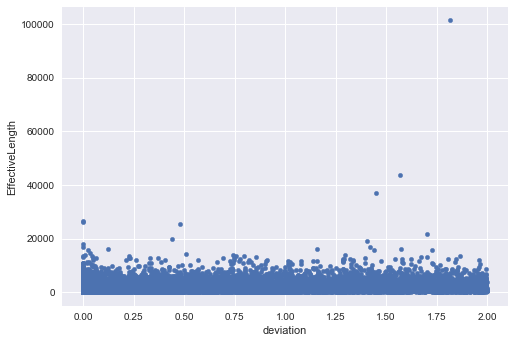

In [25]:
df_good_prop = pd.read_csv("good_prop.csv")
df_temp = {'EffectiveLength':df_good_prop['EffectiveLength'],'deviation':df_good_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength')
plt.show()

GRAPH BETWEEN TPM AND DEVIATION FOR GOOD TRANSCRIPTS:

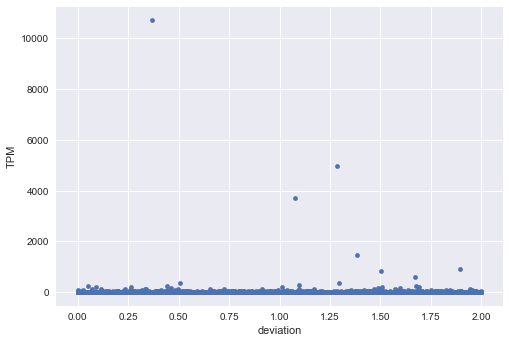

In [28]:
df_good_prop = pd.read_csv("good_prop.csv")
df_temp = {'TPM':df_good_prop['TPM'],'deviation':df_good_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

df_temp.plot(kind='scatter', x ='deviation', y ='TPM')
plt.show()

GRAPH BETWEEN TPM AND DEVIATION FOR FAULTY TRANSCRIPTS:

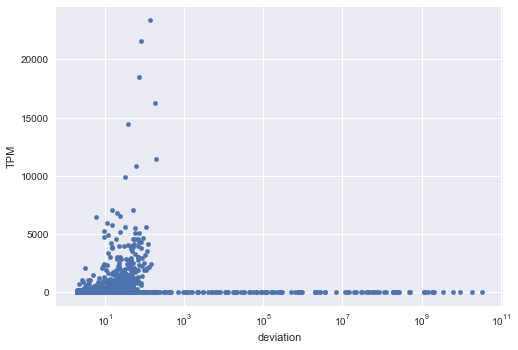

In [35]:

df_temp = {'TPM':df_faulty_prop['TPM'],'deviation':df_faulty_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

df_temp.plot(kind='scatter', x ='deviation', y ='TPM',logx=1)
plt.show()

# Transripts with TPM greater than 1000 are mostly faulty.

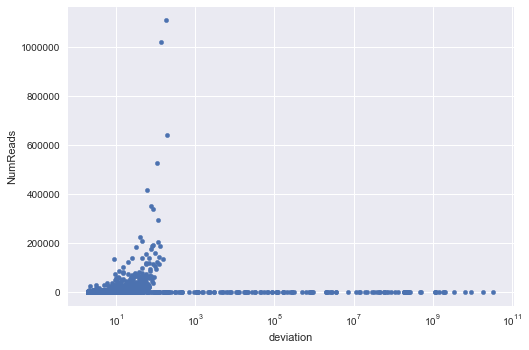

In [36]:
df_temp = {'NumReads':df_faulty_prop['NumReads'],'deviation':df_faulty_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

df_temp.plot(kind='scatter', x ='deviation', y ='NumReads',logx=1)
plt.show()

In [4]:
df_combined = pd.read_csv("combined_result.csv")

df_res = df_combined[df_combined['TPM']>1000]

df_res.to_csv("tpm_rel.csv")